In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sns.color_palette("tab10")

data = load_digits()
train = data.data

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

train = pd.DataFrame(train,
            columns=data['feature_names'])

target = data.target

num_cols = train.shape[1]
train.shape

(1797, 64)

## 主成分分析

In [2]:
def draw_scatter(d):
    train_df = pd.DataFrame(d,
            columns=[i for i in range(d.shape[1])])
    train_df['target'] = target
    
    sns.scatterplot(data=train_df, x=0, y=1, hue='target', palette='bright')

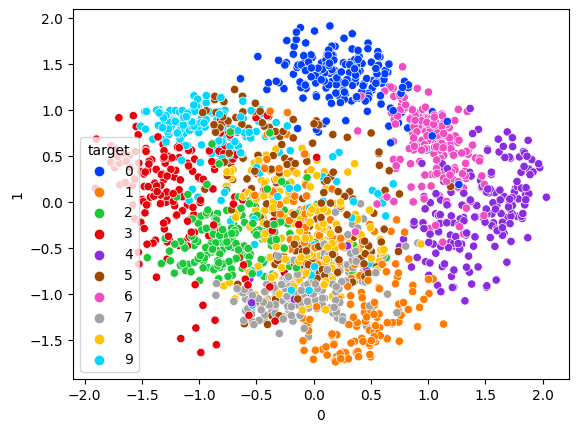

In [3]:
from sklearn.decomposition import PCA
# from sklearn.decomposition import TrucatedSVD

pca = PCA(n_components=5)
pca.fit(train)

train_pca = pca.transform(train)

draw_scatter(train_pca)

## 非負値行列因子分解（NMF）

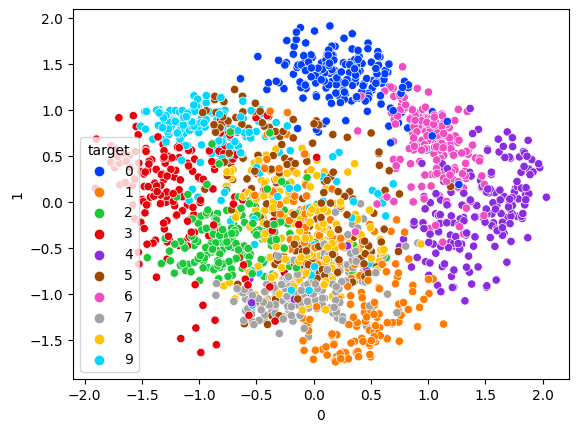

In [4]:
from sklearn.decomposition import NMF

model = NMF(n_components=5, init='random', random_state=71)
model.fit(train)

train_nmf = model.transform(train)

draw_scatter(train_pca)

## Latent Dirichlet Allocation (LDA)

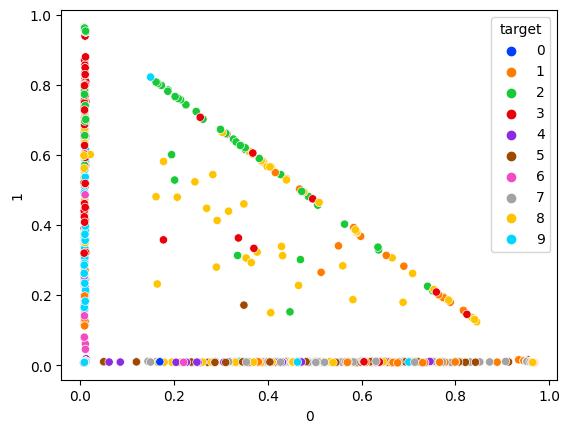

In [5]:
from sklearn.decomposition import LatentDirichletAllocation

model = LatentDirichletAllocation(n_components=5, random_state=71)
model.fit(train)

train_lda = model.transform(train)

draw_scatter(train_lda)

## 線形判別分析（LDA）

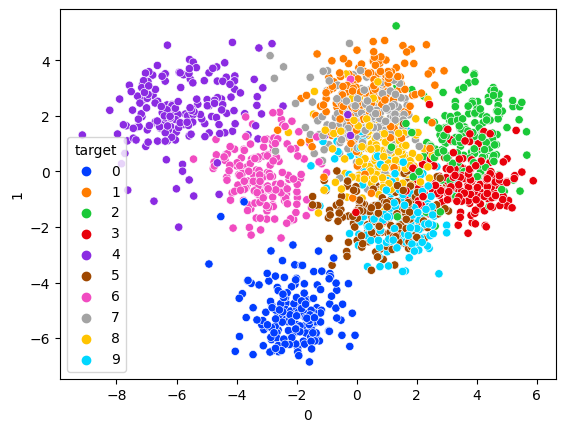

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
lda.fit(train, target)

train_lda = lda.transform(train)
draw_scatter(train_lda)

## t-SNE, UMAP

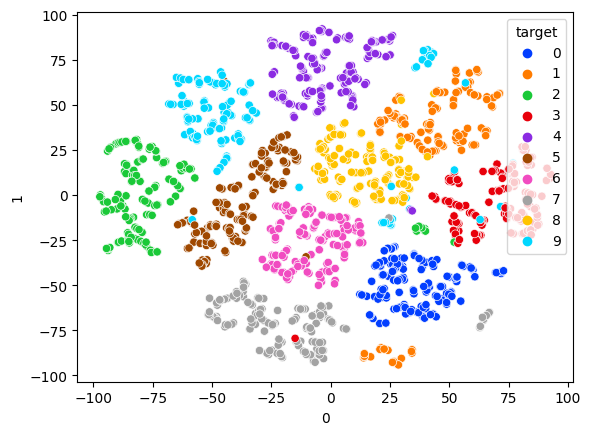

In [7]:
from sklearn.manifold import TSNE

train_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(train)

draw_scatter(train_tsne)

## クラスタリング

In [12]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=10, random_state=71)
kmeans.fit(train)

train_clusters = kmeans.predict(train)
print(train_clusters)

train_distances = kmeans.transform(train)
print(train_distances)

[0 1 1 ... 1 8 7]
[[0.8676304  3.02541145 2.44195575 ... 2.60631526 2.02625288 2.51468293]
 [3.39614437 1.27759444 2.64993017 ... 2.75784722 2.71521217 2.57706902]
 [3.00358785 1.8287632  2.78624959 ... 2.70017402 2.82439694 2.91823891]
 ...
 [2.81399984 1.69092868 2.63369426 ... 2.35743994 2.57121178 2.39754352]
 [2.17583693 2.62189208 2.14453394 ... 2.58140216 1.54612153 2.60138523]
 [2.59514711 2.30407903 2.2057834  ... 2.11124093 2.15122525 2.76243642]]
